In [2]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
from tqdm import tqdm
import plotly.express as px
import pandas as pd

In [3]:
# Load the saved power array
power_array = np.load(r'E:\Donders\Weekly meeting\PCA_ICA\power_array_non_zscored.npy')
print(power_array.shape)

(125, 298536)


In [4]:
#Angle Based Intrinsic Dimensionality
def abids(X, k):
    search_struct = cKDTree(X)
    return np.array([
        abid(X, k, x, search_struct)
        for x in tqdm(X, desc="abids", leave=False)
    ])

def abid(X, k, x, search_struct, offset=1):
    neighbor_norms, neighbors = search_struct.query(x, k + offset)
    neighbors = X[neighbors[offset:]] - x
    normed_neighbors = neighbors / neighbor_norms[offset:, None]
    para_coss = normed_neighbors.T.dot(normed_neighbors)
    return k**2 / np.sum(np.square(para_coss))


# Set the value of k (number of neighbors)
k_value = 50

# Call abids function on your dataset
ID = np.round(np.nanmean(abids(power_array.T, k_value)))

print('Intrinsic dimension = %d' % int(ID))

Intrinsic dimension = 6


C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\janlu\AppData\Local\Temp\ipykernel_8932\2121061345.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='viridis')


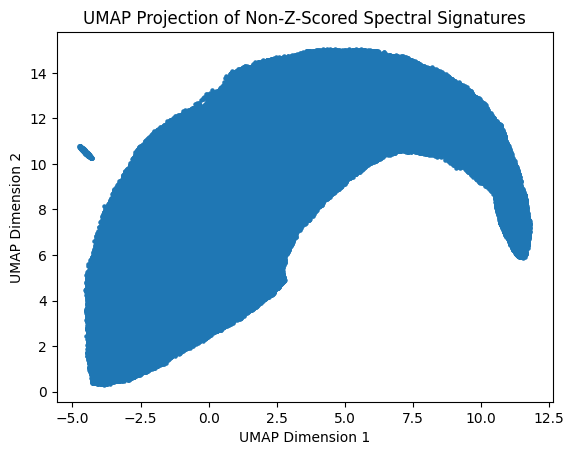

C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

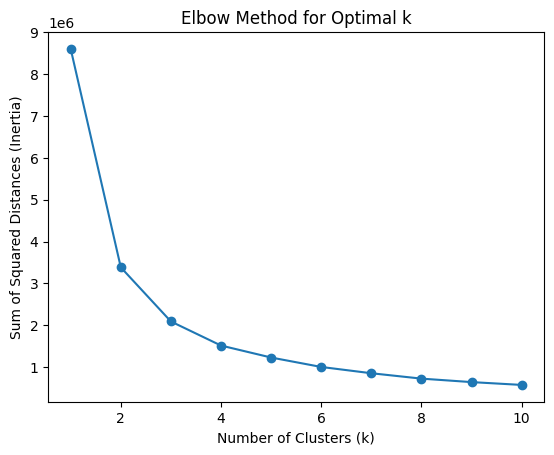

C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


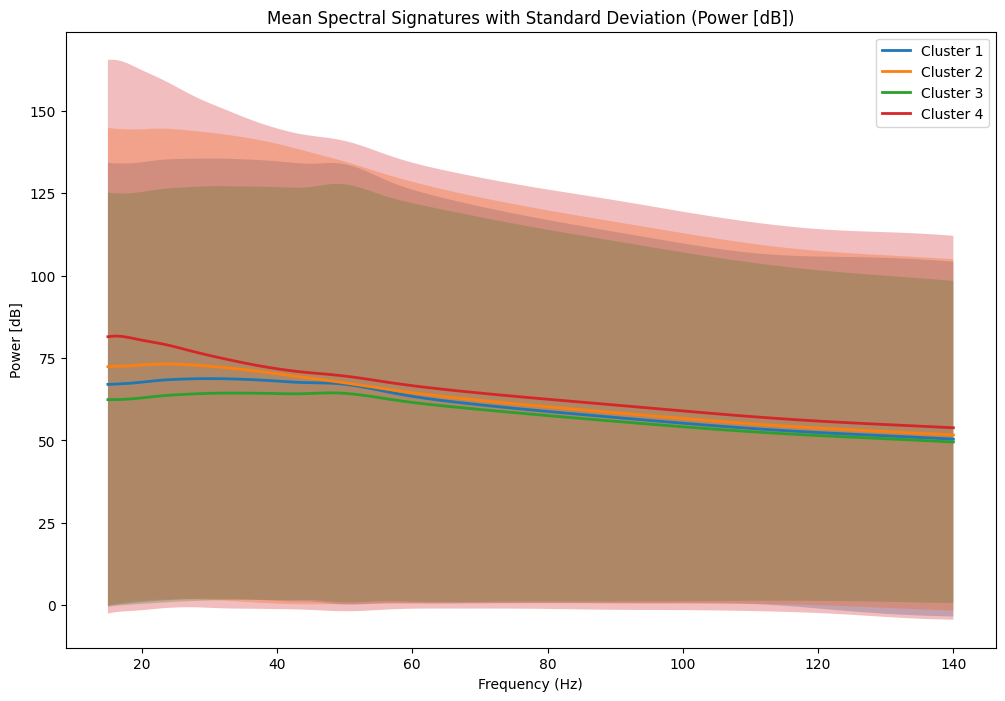

In [56]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply UMAP to reduce dimensionality
reducer = umap.UMAP(random_state=58)
embedding = reducer.fit_transform(power_array.T)

# Step 2: Visualize the data (optional)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='viridis')
plt.title('UMAP Projection of Non-Z-Scored Spectral Signatures')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Step 3: Determine the optimal number of clusters (k) using the elbow method

# Create an empty list to store the sum of squared distances (inertia) for different k values
inertia_values = []

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=58)
    kmeans.fit(embedding)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

# Choose the optimal number of clusters (replace 'optimal_k' with the identified value)
optimal_k = 4  # replace with the optimal k value

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=58)
clusters = kmeans.fit_predict(embedding)

# Identify indices for each cluster
cluster_indices = [np.where(clusters == i)[0] for i in range(optimal_k)]

# Collect spectral signatures for each cluster
spectral_signatures = [power_array[:, indices] for indices in cluster_indices]

# Calculate mean and standard deviation for each cluster
mean_signatures = [np.mean(specs, axis=1) for specs in spectral_signatures]
std_signatures = [np.std(specs, axis=1) for specs in spectral_signatures]

# Plot individual mean signatures with standard deviation in 10log10 representation
plt.figure(figsize=(12, 8))
frequency_range = np.linspace(15, 140, num=125)  # Assuming a linear frequency range from 15Hz to 140Hz
for i in range(optimal_k):
    plt.plot(frequency_range, 10 * np.log10(mean_signatures[i]), label=f'Cluster {i + 1}', linewidth=2)
    plt.fill_between(frequency_range, 10 * np.log10(mean_signatures[i]) - 10 * np.log10(std_signatures[i]),
                     10 * np.log10(mean_signatures[i]) + 10 * np.log10(std_signatures[i]), alpha=0.3)

plt.title('Mean Spectral Signatures with Standard Deviation (Power [dB])')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [dB]')
plt.legend()
plt.show()




In [23]:
# Load the saved power array
power_array2 = np.load(r'E:\Donders\Weekly meeting\PCA_ICA\power_array.npy')
print(power_array.shape)

(125, 298536)


C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


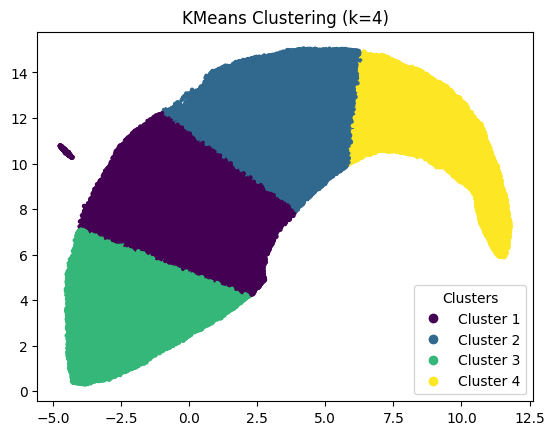

Cluster 1 Indices: [     0      2      7 ... 298532 298534 298535]
Cluster 2 Indices: [    21     32     33 ... 298528 298529 298531]
Cluster 3 Indices: [     1      3      4 ... 298523 298525 298533]
Cluster 4 Indices: [   277    477    493 ... 298484 298492 298516]


In [26]:
# Choose the optimal number of clusters (replace 'optimal_k' with the identified value)
optimal_k = 4  # replace with the optimal k value

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=58)
clusters = kmeans.fit_predict(embedding)

# Visualize the clustered data
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=5, cmap='viridis')

# Add legend
legend_labels = [f'Cluster {i + 1}' for i in range(optimal_k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.title(f'KMeans Clustering (k={optimal_k})')
plt.show()


# Identify indices for each cluster
cluster_indices = [np.where(clusters == i)[0] for i in range(optimal_k)]

# Display indices for each cluster
for i, indices in enumerate(cluster_indices):
    print(f'Cluster {i + 1} Indices: {indices}')


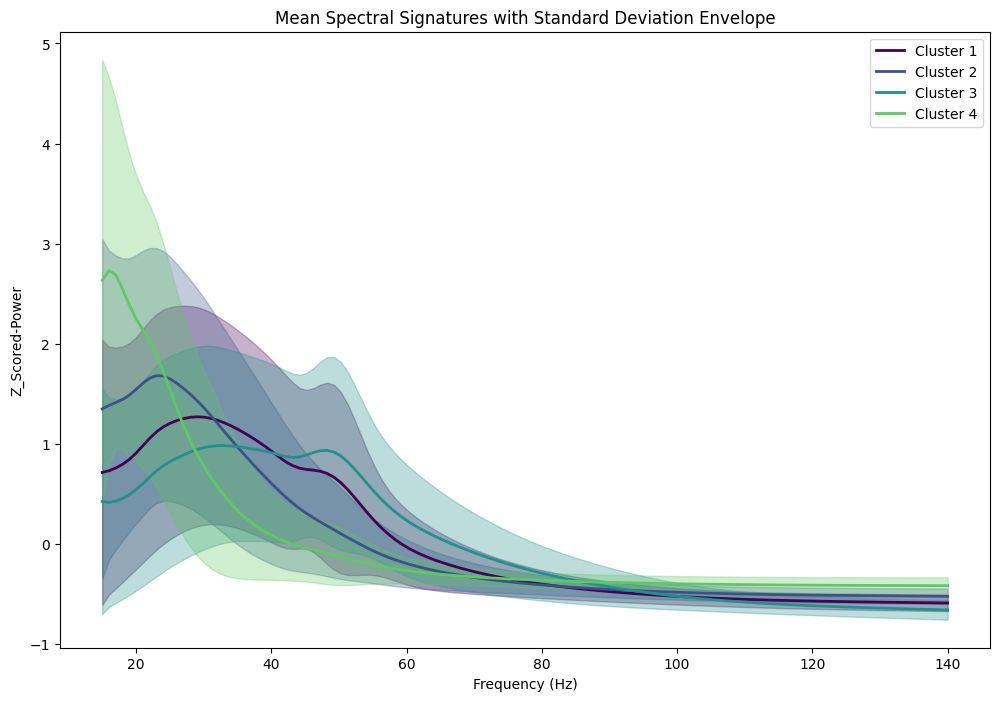

In [28]:
# Initialize lists to store mean and std spectral signatures for each cluster
cluster_mean_spectra = []
cluster_std_envelopes = []

# Extract cycles for each cluster and calculate mean and std spectral signatures
for indices in cluster_indices:
    cluster_cycles = power_array2[:, indices]
    mean_spectral_signature = np.mean(cluster_cycles, axis=1)
    std_spectral_signature = np.std(cluster_cycles, axis=1)
    cluster_mean_spectra.append(mean_spectral_signature)
    cluster_std_envelopes.append(std_spectral_signature)

# Plot mean spectral signature with std envelope for each cluster
plt.figure(figsize=(12, 8))
frequency_range = np.linspace(15, 140, num=125)  # Assuming a linear frequency range from 15Hz to 140Hz

for i, (mean_spec, std_env) in enumerate(zip(cluster_mean_spectra, cluster_std_envelopes)):
    cluster_color = plt.cm.viridis(i / optimal_k)  # Use the same color as in the scatter plot
    plt.plot(frequency_range, mean_spec, label=f'Cluster {i + 1}', color=cluster_color, linewidth=2)
    plt.fill_between(frequency_range, mean_spec - std_env, mean_spec + std_env, color=cluster_color, alpha=0.3)

plt.title('Mean Spectral Signatures with Standard Deviation Envelope')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Z_Scored-Power')
plt.legend()
plt.show()

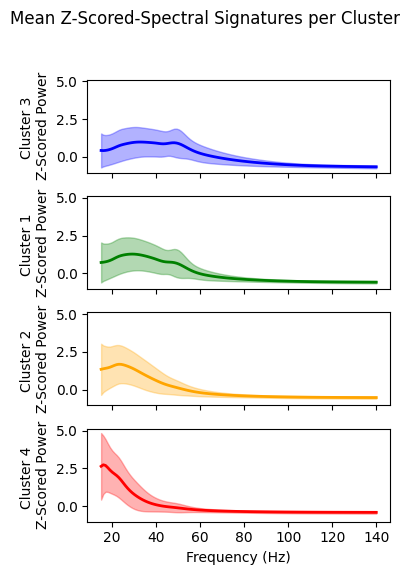

In [55]:
# Define the desired order of clusters
desired_order = [2, 0, 1, 3]  # Indices are 0-based, so 2 corresponds to Cluster 3, 0 to Cluster 1, and so on

# Specify colors for each cluster
cluster_colors = ['blue', 'green', 'orange', 'red']

# Plot mean spectral signature with std envelope for each cluster in separate subplots
fig, axs = plt.subplots(optimal_k, 1, figsize=(4, 6), sharex=True, sharey=True)
frequency_range = np.linspace(15, 140, num=125)  # Assuming a linear frequency range from 15Hz to 140Hz

for i, cluster_index in enumerate(desired_order):
    mean_spec, std_env = cluster_mean_spectra[cluster_index], cluster_std_envelopes[cluster_index]
    cluster_color = cluster_colors[i]
    
    axs[i].plot(frequency_range, mean_spec, label=f'Cluster {cluster_index + 1}', color=cluster_color, linewidth=2)
    axs[i].fill_between(frequency_range, mean_spec - std_env, mean_spec + std_env, color=cluster_color, alpha=0.3)
    axs[i].set_ylabel(f'Cluster {cluster_index + 1} \nZ-Scored Power')

plt.suptitle('Mean Z-Scored-Spectral Signatures per Cluster')
plt.xlabel('Frequency (Hz)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the suptitle
plt.show()




C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


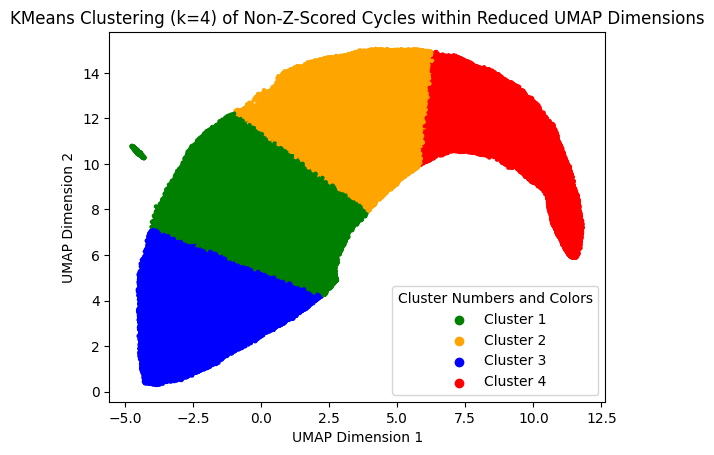

Cluster 1 Indices: [     0      2      7 ... 298532 298534 298535]
Cluster 2 Indices: [    21     32     33 ... 298528 298529 298531]
Cluster 3 Indices: [     1      3      4 ... 298523 298525 298533]
Cluster 4 Indices: [   277    477    493 ... 298484 298492 298516]


In [52]:
# Choose the optimal number of clusters (replace 'optimal_k' with the identified value)
optimal_k = 4  # replace with the optimal k value
lightorange = (1.0, 0.8, 0.6)
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=58)
clusters = kmeans.fit_predict(embedding)

# Manually specify colors for each cluster
cluster_colors = ['green', 'orange', 'blue', 'red']

# Create dummy scatter plots for legend
dummy_scatters = []
for i in range(optimal_k):
    dummy_scatter = plt.scatter([], [], c=cluster_colors[i], label=f'Cluster {i + 1}')
    dummy_scatters.append(dummy_scatter)

# Visualize the clustered data with the specified colors
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[cluster_colors[i] for i in clusters], s=5)

# Add legend with cluster numbers and colors
legend_labels = [f'Cluster {i + 1}' for i in range(optimal_k)]
plt.legend(handles=dummy_scatters, labels=legend_labels, title='Cluster Numbers and Colors')

# Add labels for UMAP dimensions
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.title(f'KMeans Clustering (k={optimal_k}) of Non-Z-Scored Cycles within Reduced UMAP Dimensions')
plt.show()

# Identify indices for each cluster
cluster_indices = [np.where(clusters == i)[0] for i in range(optimal_k)]

# Display indices for each cluster
for i, indices in enumerate(cluster_indices):
    print(f'Cluster {i + 1} Indices: {indices}')











C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


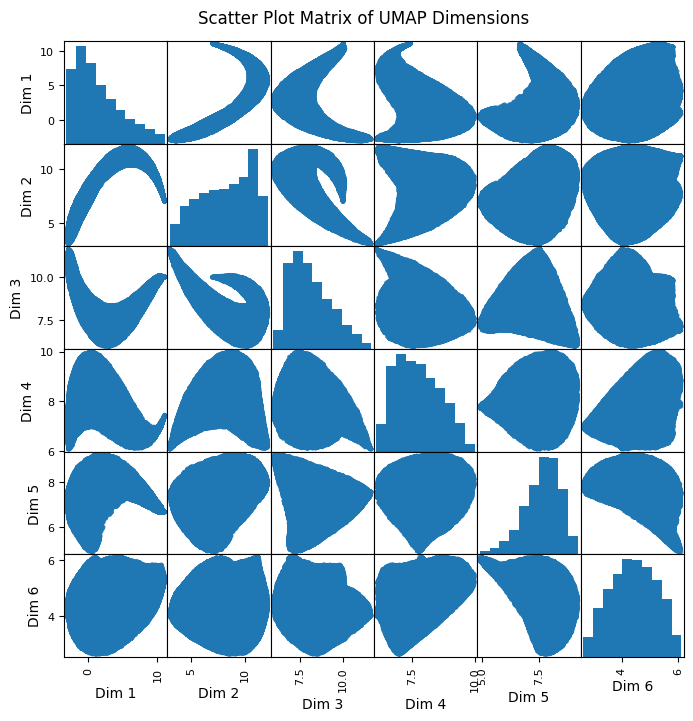

C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

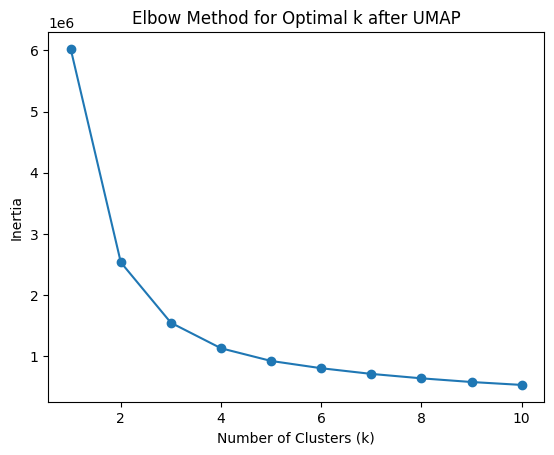

In [58]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Apply UMAP to reduce dimensionality to 6D
reducer = umap.UMAP(n_components=6, random_state=58)
embedding = reducer.fit_transform(power_array.T)

# Step 2: Convert the result to a DataFrame for easy plotting
df = pd.DataFrame(data=embedding, columns=[f'Dim {i+1}' for i in range(6)])

# Step 3: Visualize the data using a scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(8, 8), diagonal='hist')
plt.suptitle('Scatter Plot Matrix of UMAP Dimensions', y=0.92)
plt.show()

# Step 4: Elbow Method to find the optimal number of clusters
inertia = []
#Within-Cluster Sum of Squares(WCSS) measures the sum of the squared distances between each data point in a cluster and the centroid of that cluster.
# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k after UMAP')
plt.show()

C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


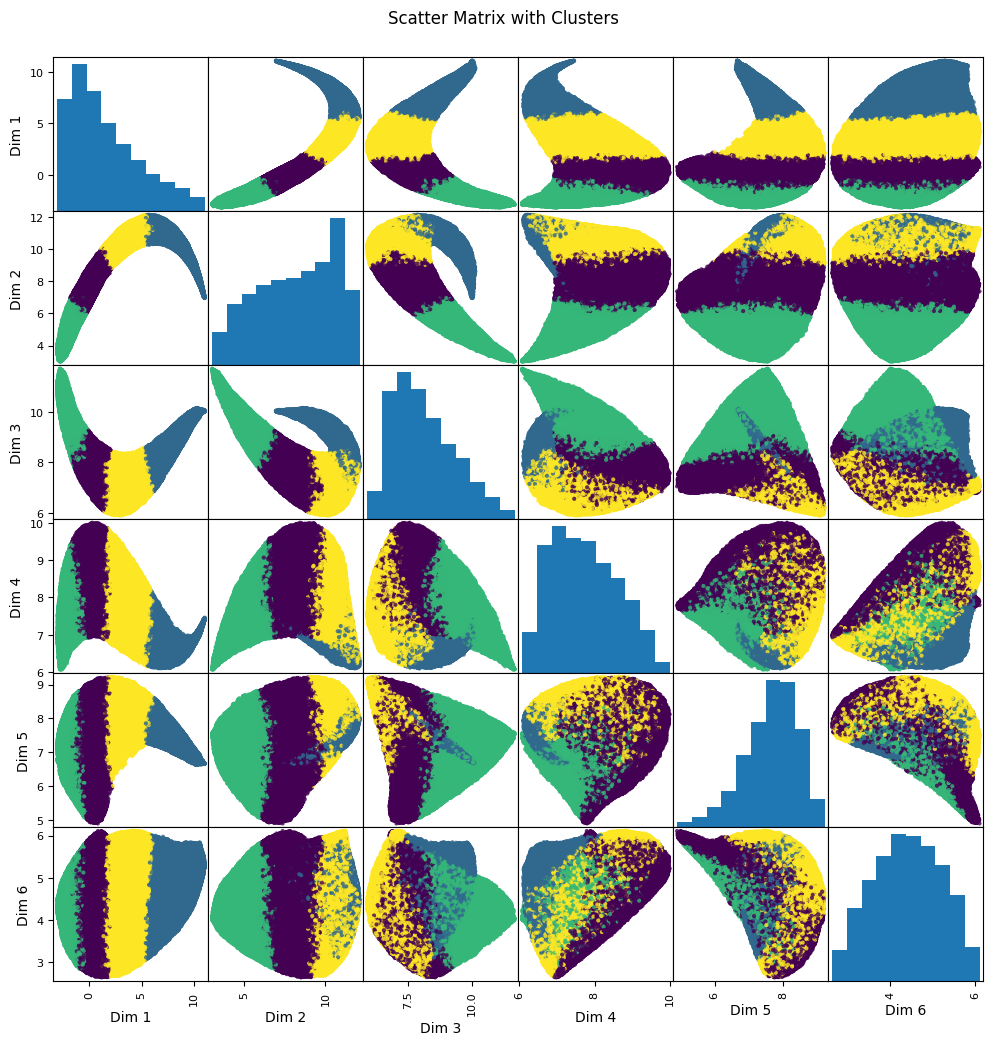

In [34]:
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

# Step 1: Apply UMAP to reduce dimensionality to 6D
reducer = umap.UMAP(n_components=6, random_state=58)
embedding = reducer.fit_transform(power_array.T)

# Step 2: Convert the result to a DataFrame for easy plotting
df = pd.DataFrame(data=embedding, columns=[f'Dim {i+1}' for i in range(6)])

# Step 3: Perform KMeans clustering with the optimal number of clusters (4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=58)
df['Cluster'] = kmeans.fit_predict(df[['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']])

# Step 4: Visualize the clusters in a scatter matrix with selected dimensions
selected_dimensions = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']

# Plot scatter matrix with cluster colors
scatter_matrix(df[selected_dimensions], c=df['Cluster'], cmap='viridis', alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix with Clusters', y=0.92)
plt.show()


In [21]:
# Group data by cluster
clustered_data = df.groupby('Cluster')

# Print all rows for each cluster
for i, (cluster_id, cluster_df) in enumerate(clustered_data):
    print(f"Cluster {cluster_id}:\n{cluster_df}\n")




Cluster 0:
           Dim 1     Dim 2     Dim 3     Dim 4     Dim 5     Dim 6  Cluster
0       0.417372  8.402093  6.901563  7.331735  8.764449  3.229492        0
2      -0.921221  6.602721  8.236791  7.506981  8.542953  3.167666        0
7      -0.672542  7.077477  8.117026  7.659015  8.419797  3.264383        0
17      0.570604  8.609695  6.558128  7.454399  8.763700  3.527149        0
18      0.822304  8.272811  6.504679  8.267502  9.154893  3.931865        0
...          ...       ...       ...       ...       ...       ...      ...
298527 -0.183076  7.290190  8.797474  7.112878  7.815550  2.939825        0
298530 -0.589526  8.079066  7.672793  8.992536  7.821223  4.480421        0
298532 -0.952308  6.583850  8.420183  9.104546  7.564281  4.827668        0
298534  1.811914  8.666332  8.460630  7.075107  7.534156  2.811892        0
298535  1.308598  8.394001  8.373415  7.053092  7.730587  2.795487        0

[97561 rows x 7 columns]

Cluster 1:
           Dim 1      Dim 2     Dim 3  

In [5]:
import pandas as pd
import umap
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Step 1: Apply UMAP to reduce dimensionality to 6D
reducer = umap.UMAP(n_components=6, random_state=58)
embedding = reducer.fit_transform(power_array.T)

# Step 2: Convert the result to a DataFrame for easy plotting
df = pd.DataFrame(data=embedding, columns=[f'Dim {i+1}' for i in range(6)])

# Step 3: Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5000)  # Adjust parameters as needed
df['Cluster'] = dbscan.fit_predict(df[['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']])

# Step 4: Visualize the clusters in a scatter matrix with selected dimensions
selected_dimensions = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']

# Plot scatter matrix with cluster colors
scatter_matrix(df[selected_dimensions], c=df['Cluster'], cmap='viridis', alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix with Clusters (DBSCAN)', y=0.92)
plt.show()




C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


MemoryError: 

In [44]:
import pandas as pd
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Assuming 'power_array' is your data
# Assuming 'X' is your data for the parameter tuning
# Assuming 'X' and 'power_array' have similar structures

# Step 1: Apply UMAP to reduce dimensionality to 6D
reducer = umap.UMAP(n_components=6, n_neighbors=15, min_dist=0.1, random_state=58)
embedding = reducer.fit_transform(power_array.T)

# Step 2: Convert the result to a DataFrame for easy plotting
df = pd.DataFrame(data=embedding, columns=[f'Dim {i+1}' for i in range(6)])

# Step 3: Perform DBSCAN clustering
# Parameter tuning using silhouette score
X_scaled = StandardScaler().fit_transform(df)

best_epsilon = None
best_minPts = None
best_silhouette_score = -1

epsilons = [0.5, 1.0, 1.5]
minPts_values = [5000, 10000, 15000]

for epsilon in epsilons:
    for minPts in minPts_values:
        dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
        labels = dbscan.fit_predict(X_scaled)
        
        # Evaluate clustering performance
        silhouette_avg = silhouette_score(X_scaled, labels)
        
        # Print or store results
        print(f"Epsilon: {epsilon}, MinPts: {minPts}, Silhouette Score: {silhouette_avg}")
        
        # Update best parameters if silhouette score is higher
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_epsilon = epsilon
            best_minPts = minPts

# Step 4: Perform DBSCAN clustering with the best parameters
dbscan_best = DBSCAN(eps=best_epsilon, min_samples=best_minPts)
df['Cluster'] = dbscan_best.fit_predict(X_scaled)

# Step 5: Visualize the clusters in a scatter matrix with selected dimensions
selected_dimensions = ['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6']

# Plot scatter matrix with cluster colors and color bar
scatter_matrix(df[selected_dimensions], c=df['Cluster'], cmap='viridis', alpha=0.8, figsize=(12, 12), diagonal='hist', cbar=True)
plt.suptitle('Scatter Matrix with Clusters (DBSCAN)', y=0.92)
plt.show()

# Additional Cluster Analysis
cluster_sizes = df['Cluster'].value_counts()
noise_points = (df['Cluster'] == -1).sum()

print("Cluster Sizes:")
print(cluster_sizes)
print("Number of Noise Points:", noise_points)



C:\Users\janlu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)